# Unidad 2: Modelos de regresión

Importar librerías básicas

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io  # pip install scipy

## Problema 1: Modelo Lineal 

### 1.- Procesamiento de los datos

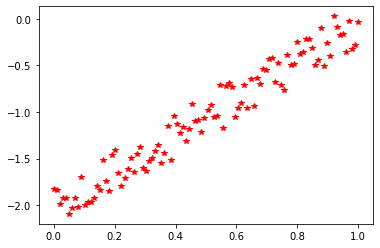

In [49]:
#Cargar datos
data = scipy.io.loadmat('datos/data_1.mat')

#Extraer valores
x = data['x']
y = data['y']

#Imprimir valores
plt.plot(x, y, '*', color='red');

### 2.- Definición del modelo

In [50]:
# Se propone un modelo lineal
#       Y = wx + b    -->    Entrada: x , Parámetros: w, b
# Se propone una función de error de medio cuadráticos
#       e = 1/2 * (Ym - Yd)^2

In [51]:
# Error medio cuadrático
def emc(ym,yd):
    e = 0.5*np.power(ym-yd,2)
    return e

# Crear modelo
class recta():
    
    # Constructor
    def __init__(self,w,b):
        
        # Inicializar parametros del modelo
        self.w = w
        self.b = b
        
        
    # Procesamiento (foward pass)
    def foward(self,x):
        
        y = self.w*x + self.b
        return y
    
    # Método de entrenamiento (PROBLEMA DE OPTIMIZACIÓN)
    def train(self,x,y,Lr,epoch):
        
        # Inicializar el error
        self.e = np.zeros(epoch)
        
        # Ciclo épocas
        for i in range(epoch):
            
            # Ciclo de los datos
            for j in range(x.shape[1]):
                
                # Obtener entradas
                x_in = x[0,j]
                yd = y[0,j]
                
                # Obtener salidas
                ym = self.w*x_in+self.b
                
                # Calcular las gradiantes
                de_w = (ym-yd)*x_in
                de_b = (ym-yd)
                
                # Actualizar los parámetros
                self.w = self.w-Lr*de_w
                self.b = self.b-Lr*de_b
                
                # Calcular error
                self.e[i] = self.e[i]+emc(ym,yd)
                
            # Promediar error de la epoca
            self.e[i] = self.e[i]/x.shape[1]

### 3.- Entrenamiento del modelo

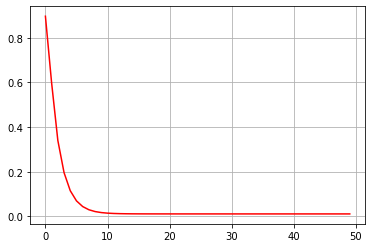

In [52]:
# Crear instancia del modelo
modelo = recta(-5.0,4)

# Entrenar modelo
modelo.train(x,y,0.1,50)

# Imprimir error
plt.figure(1)
plt.plot(modelo.e,"r")
plt.grid()
plt.show()

### 4.- Evaluación del modelo

Dimension de la entrada: (1, 100)
Error: 0.0105653338310625


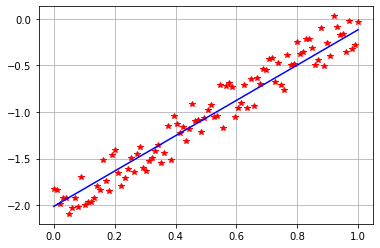

In [53]:
# Inicializar salida del modelo
ym = np.zeros(y.shape)

# Inicializar error
e = 0.0

print ("Dimension de la entrada: " + str(x.shape))

#Evaluar modelo en datos
for i in range(x.shape[1]):
    
    # Someter modelo a entrada
    ym[0,i] = modelo.foward(x[0,i])
    
    # Calcular error de la entrada
    e = e + emc(ym[0,i],y[0,i])
    
# Calcular error promedio
e = e/x.shape[1]

# Imprmir error
print("Error: " + str(e))

# Graficar
plt.plot(x, y, '*', color='red');
plt.plot(x[0,:], ym[0,:], color='blue');
plt.grid()

### 5.- Problema de optimización

In [54]:
# Se propone Gradiete Descendiente
# Donde el mínimo e, es determinado por w, b
# wo = wo -Lr(de/dw)  --> Se aplican derivadas parciales  
# de/dYm*dYm/dw = (Ym - yd) * x
# de/dYm*dYm/db = (Ym - yd) * 1


## Problema 2: Modelo cuadrático

### 1.- Procesamiento de los datos

X(100, 1)
Y(100, 1)


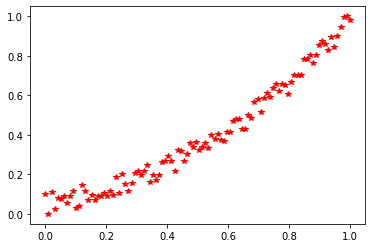

In [55]:
#Cargar datos
data = scipy.io.loadmat('datos/data_2.mat')

#Extraer valores
x = data['x']
y = data['y']

# Transponer datos en columna
x = np.transpose(data['x'])
y = np.transpose(data['y'])

# Imprimir dimensiones de los datos
print("X" + str(x.shape))
print("Y" + str(y.shape))

# Normalizar Y
y = (y-np.min(y))
y = y/np.max(y)

# Imprimir valores
plt.plot(x, y, '*', color='red');

### 2.- Definición del modelo

In [56]:
# Se propone un modelo cuadrático
#       Y = ax^2 + bx + c   -->    Entrada: x , Parámetros: a, b, c

# Se propone una función de error de medio cuadráticos
#       e = 1/2 * (Ym - Yd)^2

# Se propone Gradiete Descendiente
# Donde el mínimo e, es determinado por a, b, c
# wo = wo -Lr(de/dw)  --> Se aplican derivadas parciales  
# de/dYm = (Ym - Yd) 
# dYm/da = x^2
# dYm/db = x
# dYm/dc = 1

In [57]:
class cuadratica():
    
    # Constructor
    def __init__(self,a,b,c):
        
        # Definir atributos
        self.a = a
        self.b = b
        self.c = c
        
    # Procesamiento hacia adelante
    def foward(self,x):
        
        ym = self.a*np.power(x,2) + self.b*x + self.c
        return ym
    
    # Método de entrenamiento
    def train(self,x,y,Lr,epoch):
        
        # Inicializar error
        self.e = np.zeros(epoch)
        
        # Lazo épocas
        for i in range(epoch):
            
            # Lazo de los datos
            for j in range(x.shape[0]):
                
                # Obtener datos de entrada
                x_in = x[j,0]
                yd = y[j,0]
                
                # Obtener salida del modelo 
                ym = self.a*np.power(x_in,2) + self.b*x_in + self.c
                
                # Gradientes de la función de error
                de_ym = (ym-yd)
                
                # Gradientes del modelo
                dym_a = np.power(x_in,2)
                dym_b = x_in
                dym_c = 1
                
                # Gradientes de variables
                de_a = de_ym*dym_a
                de_b = de_ym*dym_b
                de_c = de_ym*dym_c
    
                # Actualizar datos
                self.a = self.a - Lr*de_a
                self.b = self.b - Lr*de_b
                self.c = self.c - Lr*de_c
                
                # Calcular error
                self.e[i] = self.e[i]+emc(ym,yd)
                
            # Promediar error de la epoca
            self.e[i] = self.e[i]/x.shape[0]

### 3.- Entrenamiento del modelo

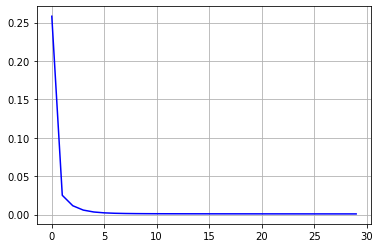

In [58]:
# Crear instancia del modelo
curva = cuadratica(1.0,2.0,3.0)

# Entrenar modelo
curva.train(x,y,0.1,30)

# Imprimir error
plt.figure(2)
plt.plot(curva.e,"b")
plt.grid()
plt.show()

### 4.- Evaluación del modelo

Dimension de la entrada: (100, 1)
Error: 0.0011885158419448884


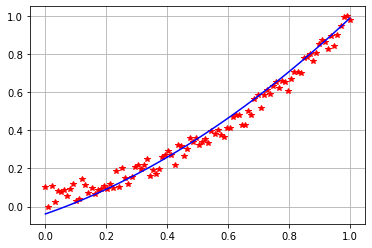

In [59]:
# Inicializar salida del modelo
ym = np.zeros(y.shape)

# Inicializar error
e = 0.0

print ("Dimension de la entrada: " + str(x.shape))

#Evaluar modelo en datos
for i in range(x.shape[0]):
    
    # Someter modelo a entrada
    ym[i,0] = curva.foward(x[i,0])
    
    # Calcular error de la entrada
    e = e + emc(ym[i,0],y[i,0])
    
# Calcular error promedio
e = e/x.shape[0]

# Imprmir error
print("Error: " + str(e))

# Graficar
plt.plot(x, y, '*', color='red');
plt.plot(x[:,0], ym[:,0], color='blue');
plt.grid()

## Problema 3: Modelo cúbico

### 1.- Procesamiento de los datos

X(100, 1)
Y(100, 1)


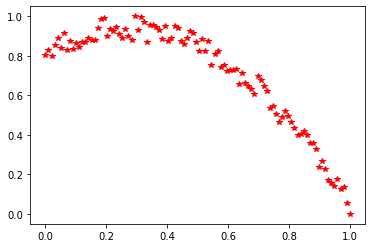

In [60]:
#Cargar datos
data = scipy.io.loadmat('datos/data_3.mat')

#Extraer valores
x = data['x']
y = data['y']

# Transponer datos en columna
x = np.transpose(data['x'])
y = np.transpose(data['y'])

# Imprimir dimensiones de los datos
print("X" + str(x.shape))
print("Y" + str(y.shape))

# Normalizar Y
y = (y-np.min(y))
y = y/np.max(y)

#Imprimir valores
plt.plot(x, y, '*', color='red');

### 2.- Definición del modelo

In [61]:
# Se propone un modelo cúbico
#       Y = ax^3 + bx^2 + cx + d   -->    Entrada: x , Parámetros: a, b, c, d

# Se propone una función de error de medio cuadráticos
#       e = 1/2 * (Ym - Yd)^2

# Se propone problema de optimización
# Minimizar el error ---> e_min = e(Ym,Yd) con a_min, b_min, c_min, d_min

# Se propone Gradiete Descendiente
# Donde el mínimo e, es determinado por a, b, c, d
# wo = wo -Lr(de/dw)  --> Se aplican derivadas parciales  
# de/dYm = (Ym - Yd) 
# dYm/da = x^3
# dYm/db = x^2
# dYm/dc = x
# dYm/dd = 1

In [68]:
class cubica():
    
    # Constructor
    def __init__(self,a,b,c,d):
        
        # Definir atributos
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        
    # Procesamiento hacia adelante
    def foward(self,x):
        
        ym = self.a*np.power(x,3) + self.b*np.power(x,2) + self.c*x + self.d
        return ym
    
    # Método de entrenamiento
    def train(self,x,y,Lr,epoch):
        
        # Inicializar error
        self.e = np.zeros(epoch)
        
        # Lazo épocas
        for i in range(epoch):
            
            # Lazo de los datos
            for j in range(x.shape[0]):
                
                # Obtener datos de entrada
                x_in = x[j,0]
                yd = y[j,0]
                
                # Obtener salida del modelo 
                ym = self.a*np.power(x_in,3) + self.b*np.power(x_in,2) + self.c*x_in + self.d
                
                # Gradientes de la función de error
                de_ym = (ym-yd)
                
                # Gradientes del modelo
                dym_a = np.power(x_in,3)
                dym_b = np.power(x_in,2)
                dym_c = x_in
                dym_d = 1
                
                # Gradientes de variables
                de_a = de_ym*dym_a
                de_b = de_ym*dym_b
                de_c = de_ym*dym_c
                de_d = de_ym*dym_d
    
                # Actualizar datos
                self.a = self.a - Lr*de_a
                self.b = self.b - Lr*de_b
                self.c = self.c - Lr*de_c
                self.d = self.d - Lr*de_d
                
                # Calcular error
                self.e[i] = self.e[i] + emc(ym,yd)
                
            # Promediar error de la epoca
            self.e[i] = self.e[i]/x.shape[0]

### 3.- Entrenamiento del modelo

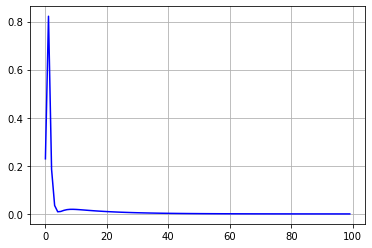

In [103]:
# Crear instancia del modelo
cubo = cubica(5.0,4.0,3.0,2.0)

# Entrenar modelo
cubo.train(x,y,0.1,100)

# Imprimir error
plt.figure(3)
plt.plot(cubo.e,"b")
plt.grid()
plt.show()

### 4.- Evaluación del modelo

Dimension de la entrada: (100, 1)
Parametros:  a: -0.3852238245447107 b: -1.001193156399313 c: 0.546473040256638 d: 0.8682768949267903
Error: 0.0007736317102041164


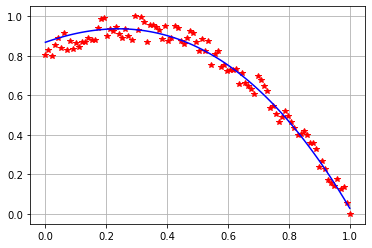

In [105]:
# Inicializar salida del modelo
ym = np.zeros(y.shape)

# Inicializar error
e = 0.0

print ("Dimension de la entrada: " + str(x.shape))
print ("Parametros: " + " a: " + str(cubo.a) + " b: " + str(cubo.b) + " c: " + str(cubo.c) + " d: " + str(cubo.d))

#Evaluar modelo en datos
for i in range(x.shape[0]):
    
    # Someter modelo a entrada
    ym[i,0] = cubo.foward(x[i,0])
    
    # Calcular error de la entrada
    e = e + emc(ym[i,0],y[i,0])
    
# Calcular error promedio
e = e/x.shape[0]

# Imprmir error
print("Error: " + str(e))

# Graficar
plt.plot(x, y, '*', color='red');
plt.plot(x[:,0], ym[:,0], color='blue');
plt.grid()